<a href="https://colab.research.google.com/github/abigailvania99/machineLearning/blob/main/Tugas_Machine_Learning_ke_1_PCA_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

## Tugas ke-1 (PCA)

### Nama: Abigail Vania
### NIM : 2402345072

<br>
Data yang digunakan dari kaggle berupa data audit risiko yang digunakan untuk mengklasifikasikan Perusahaan Penipuan

<b> 1. Import library</b>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

<b> 2. Mengambil dan Menampung Data

Mengambil data audit berupa csv yang telah di download

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/abigailvania99/machineLearning/main/audit_data.csv")

<li> Melihat 5 sample data teratas

In [ ]:
df.head(5)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


Terdapat 27 kolom pada data audit

<b> 3. Data Preprocessing

<li> Melihat ringakasan data dapat menggunakan .describe()

In [ ]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


<li> Memeriksa ada kolom apa saja dalam data

In [ ]:
df.keys()

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

<li> Menghapus kolom 'LOCATION_ID', karena kolom tersebut tidak digunakan

In [ ]:
df.drop(columns=['LOCATION_ID'], inplace = True)

<li> Memeriksa apakah kolom 'LOCATION_ID' sudah terhapus

In [ ]:
df.keys()

Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value',
       'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History',
       'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

<li> Memeriksa apakah ada data yang kosong

In [ ]:
df.isnull().sum().sum()

1

Ada 1 data null, mari kita cek data pada atribut apa yang null

In [ ]:
df.isnull().sum()

Sector_score      0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

Ternyata ada 1 data pada atribut Money_Value yang null <br>
Karena hanya ada 1 data yang null, maka data tersebut dihapus saja

In [ ]:
df = df.dropna()

<li> Memeriksa kembali apakah masih ada data yang null

In [ ]:
df.isnull().sum().sum()

0

Artinya sudah tidak ada data yang null

<li> Memisahkan data antara atribut dengan target <br>
    Target merupakan kolom yang bernama 'Risk', selain itu adalah atribut

In [ ]:
x = df.drop("Risk", axis=1)
y = df["Risk"]

<li> Memisahkan dataset antara dataset trainning dengan dataset test<br>
    
Data yang digunakan sebagai testing adalah 30% dari jumlah data keseluruhan dan random state yang digunakan adalah 50

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

<li> Melakukan standarisasi data dengan menggunakan z-score

In [ ]:
zscaler = StandardScaler()

X_train_standard = zscaler.fit_transform(X_train)
X_test_standard = zscaler.transform(X_test)

<b> 4. Melakukan klasifikasi Naive Bayes dan performance confusion matrix sebelum PCA

<li> Melakukan trainning menggunakan Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_standard, y_train)

GaussianNB()

<li> Melakukan prediksi data

In [ ]:
y_prediction_before_pca = gnb.predict(X_test_standard)

<li> Membuat confusion matrix dan hasil dari klasifikasi

In [ ]:
confusion_matrix_before_pca = confusion_matrix(y_test, y_prediction_before_pca)
classification_report_before_pca = classification_report(y_test, y_prediction_before_pca)

print("Confusion Matrix Sebelum PCA:")
print(confusion_matrix_before_pca)

print("\nClassification Report Sebelum PCA:")
print(classification_report_before_pca)

Confusion Matrix Sebelum PCA:
[[135   6]
 [ 20  72]]

Classification Report Sebelum PCA:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       141
           1       0.92      0.78      0.85        92

    accuracy                           0.89       233
   macro avg       0.90      0.87      0.88       233
weighted avg       0.89      0.89      0.89       233



Akurasi sebelum melakukan PCA adalah 89% dengan menggunakan Naive Bayes

<b> 5. Melakukan PCA</b><br>
Melakukan PCA dari 25 atribut menjadi 2 atribut agar lebih mudah dilakukan visualisasi

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_standard)
X_test_pca = pca.transform(X_test_standard)

<b> 5.1. Melakukan klasifikasi dan performance confusion matrix setelah PCA</b><br>
Melakukan klasifikasi dengan Naive Bayes setelah melakukan PCA<br>
<li> Melakukan trainning data yang sudah dilakukan PCA menggunakan Naive Bayes

In [ ]:
gnb_after = GaussianNB()
gnb_after.fit(X_train_pca, y_train)

GaussianNB()

<li> Melakukan prediksi setelah melakukan PCA

In [ ]:
y_prediction_after_pca = gnb_after.predict(X_test_pca)

<li> Membuat confusion matrix dan hasil dari klasifikasi setelah dilakukan PCA

In [ ]:
confusion_matrix_after_pca = confusion_matrix(y_test, y_prediction_after_pca)
classification_report_after_pca = classification_report(y_test, y_prediction_after_pca)

print("\nConfusion Matrix Setelah PCA:")
print(confusion_matrix_after_pca)

print("\nClassification Report Setelah PCA:")
print(classification_report_after_pca)


Confusion Matrix Setelah PCA:
[[136   5]
 [  5  87]]

Classification Report Setelah PCA:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       141
           1       0.95      0.95      0.95        92

    accuracy                           0.96       233
   macro avg       0.96      0.96      0.96       233
weighted avg       0.96      0.96      0.96       233



Akurasi setelah melakukan PCA adalah 96%. Artinya memiliki peningkatan akurasi sebesar 7% dibandingkan dengan sebelum dilakukan PCA

Text(518.4494949494949, 0.5, 'Aktual')

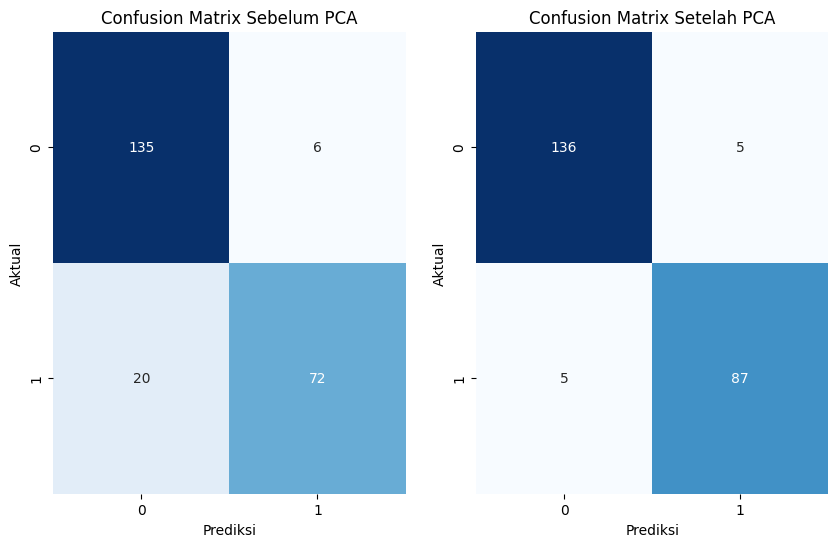

In [ ]:

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix_before_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Sebelum PCA")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix_after_pca, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix Setelah PCA")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")

<b>Sebelum melakukan PCA </b> <br>
True Negatives : 135 <br>
False Positives : 6 <br>
False Negatives : 20 <br>
True Positives : 72 <br> <br>

<b>Setelah melakukan PCA </b> <br>
True Negatives : 136 <br>
False Positives : 5 <br>
False Negatives : 5 <br>
True Positives : 87 <br> <br>


<li> Akurasi, Presis, Recall dan F1-score sebelum dilakukannya PCA

In [ ]:
accuracy = accuracy_score(y_test, y_prediction_before_pca)
print("Akurasi:", round(accuracy,2))

precision = precision_score(y_test, y_prediction_before_pca)
print("Presisi:", round(precision,2))

recall = recall_score(y_test, y_prediction_before_pca)
print("Recall:", round(recall,2))

f1Score = f1_score(y_test, y_prediction_before_pca)
print("F1-score:", round(f1Score,2))

Akurasi: 0.89
Presisi: 0.92
Recall: 0.78
F1-score: 0.85


<li> Akurasi, Presis, Recall dan F1-score setelah dilakukannya PCA

In [ ]:
accuracy = accuracy_score(y_test, y_prediction_after_pca)
print("Akurasi:", round(accuracy,2))

precision = precision_score(y_test, y_prediction_after_pca)
print("Presisi:", round(precision,2))

recall = recall_score(y_test, y_prediction_after_pca)
print("Recall:", round(recall,2))

f1Score = f1_score(y_test, y_prediction_after_pca)
print("F1-score:", round(f1Score,2))

Akurasi: 0.96
Presisi: 0.95
Recall: 0.95
F1-score: 0.95


<b>Berikut plot data sebelum dan sesudah melakukan PCA

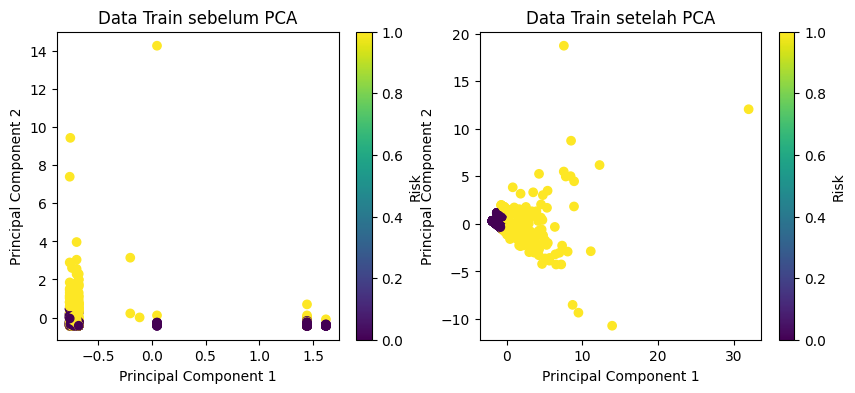

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X_train_standard[:, 0], X_train_standard[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Train sebelum PCA')
plt.colorbar(label='Risk')

plt.subplot(1,2,2)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Train setelah PCA')
plt.colorbar(label='Risk')

plt.show()